In [4]:
from wykop import WykopAPI
import networkx as nx
api = WykopAPI("x", "x")
api.authenticate()
tag_name = "polityka"
related = api.make_request(f"tags/{tag_name}/related")
related["data"]

2024-04-16 20:44:57.583 | DEBUG    | wykop.wykop_api:authenticate:42 - Authenticated successfully.
2024-04-16 20:44:57.584 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/polityka/related


[{'name': '4konserwy'},
 {'name': 'sejm'},
 {'name': 'wybory'},
 {'name': 'polska'},
 {'name': 'bekazpisu'},
 {'name': 'heheszki'},
 {'name': 'neuropa'},
 {'name': 'korwin'},
 {'name': 'bekazlewactwa'},
 {'name': 'wydarzenia'}]

In [5]:
G = nx.Graph()
G.add_node(tag_name)

In [6]:
for related_tag in related["data"]:
    G.add_edge(tag_name, related_tag["name"])
    second_degree_related = api.make_request(f"tags/{related_tag['name']}/related")
    for second_degree_tag in second_degree_related["data"]:
        G.add_edge(related_tag["name"], second_degree_tag["name"])


2024-04-16 20:44:57.642 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/4konserwy/related
2024-04-16 20:44:57.669 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/sejm/related
2024-04-16 20:44:57.693 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/wybory/related
2024-04-16 20:44:57.719 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/polska/related
2024-04-16 20:44:57.744 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/bekazpisu/related
2024-04-16 20:44:57.772 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/heheszki/related
2024-04-16 20:44:57.798 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/neuropa/related
2024-04-16 20:44:57.824 | DEBUG    | wykop.wykop_api:make_requ

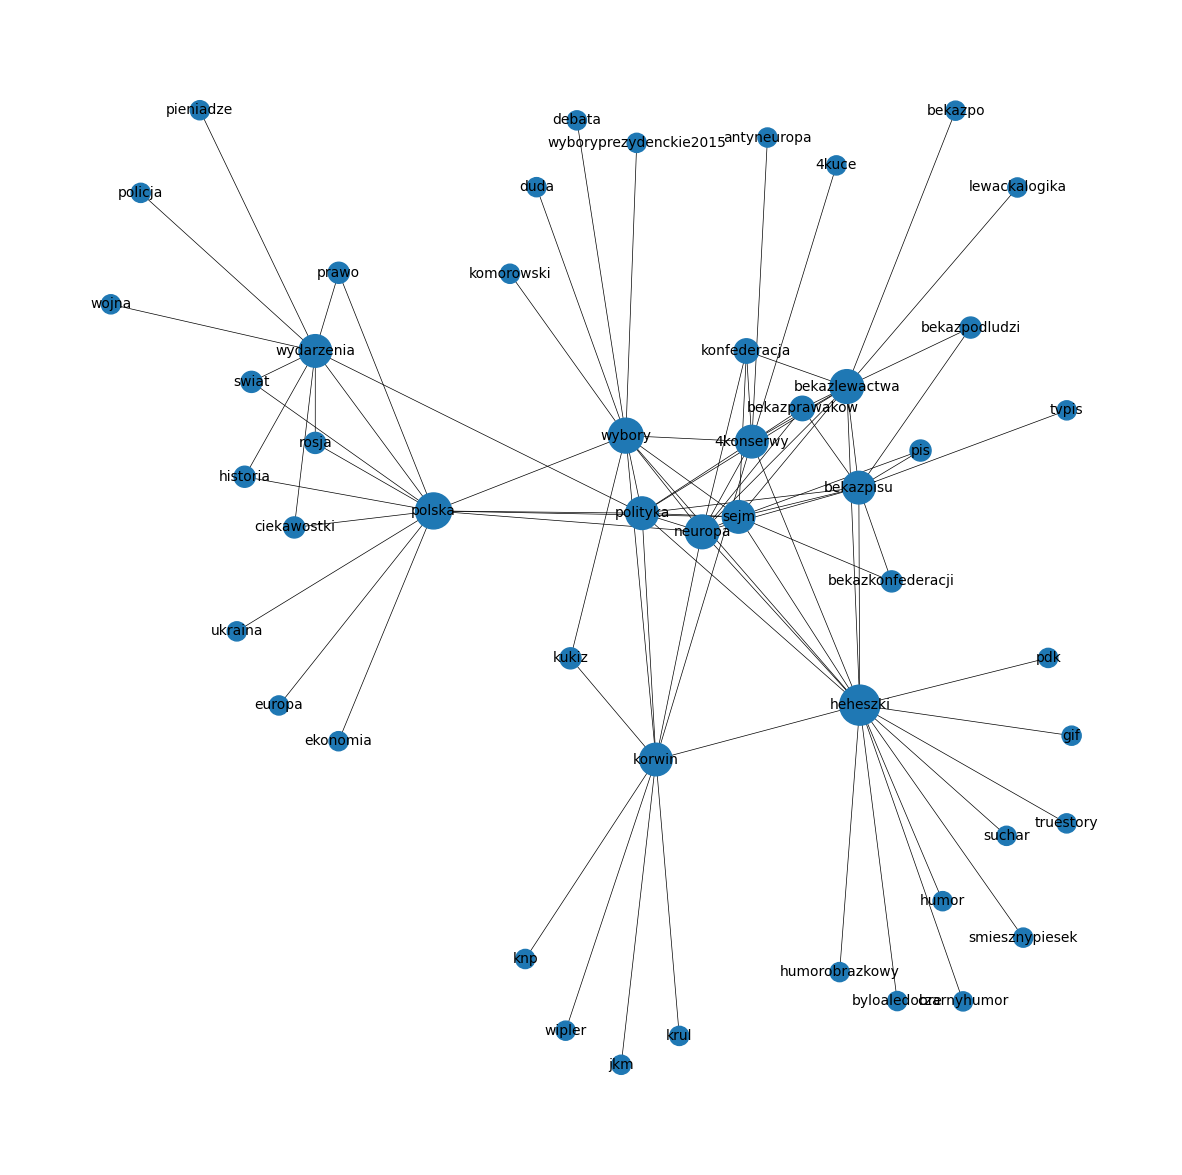

In [12]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=[150+ v * 4S0 for v in dict(G.degree).values()])

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()